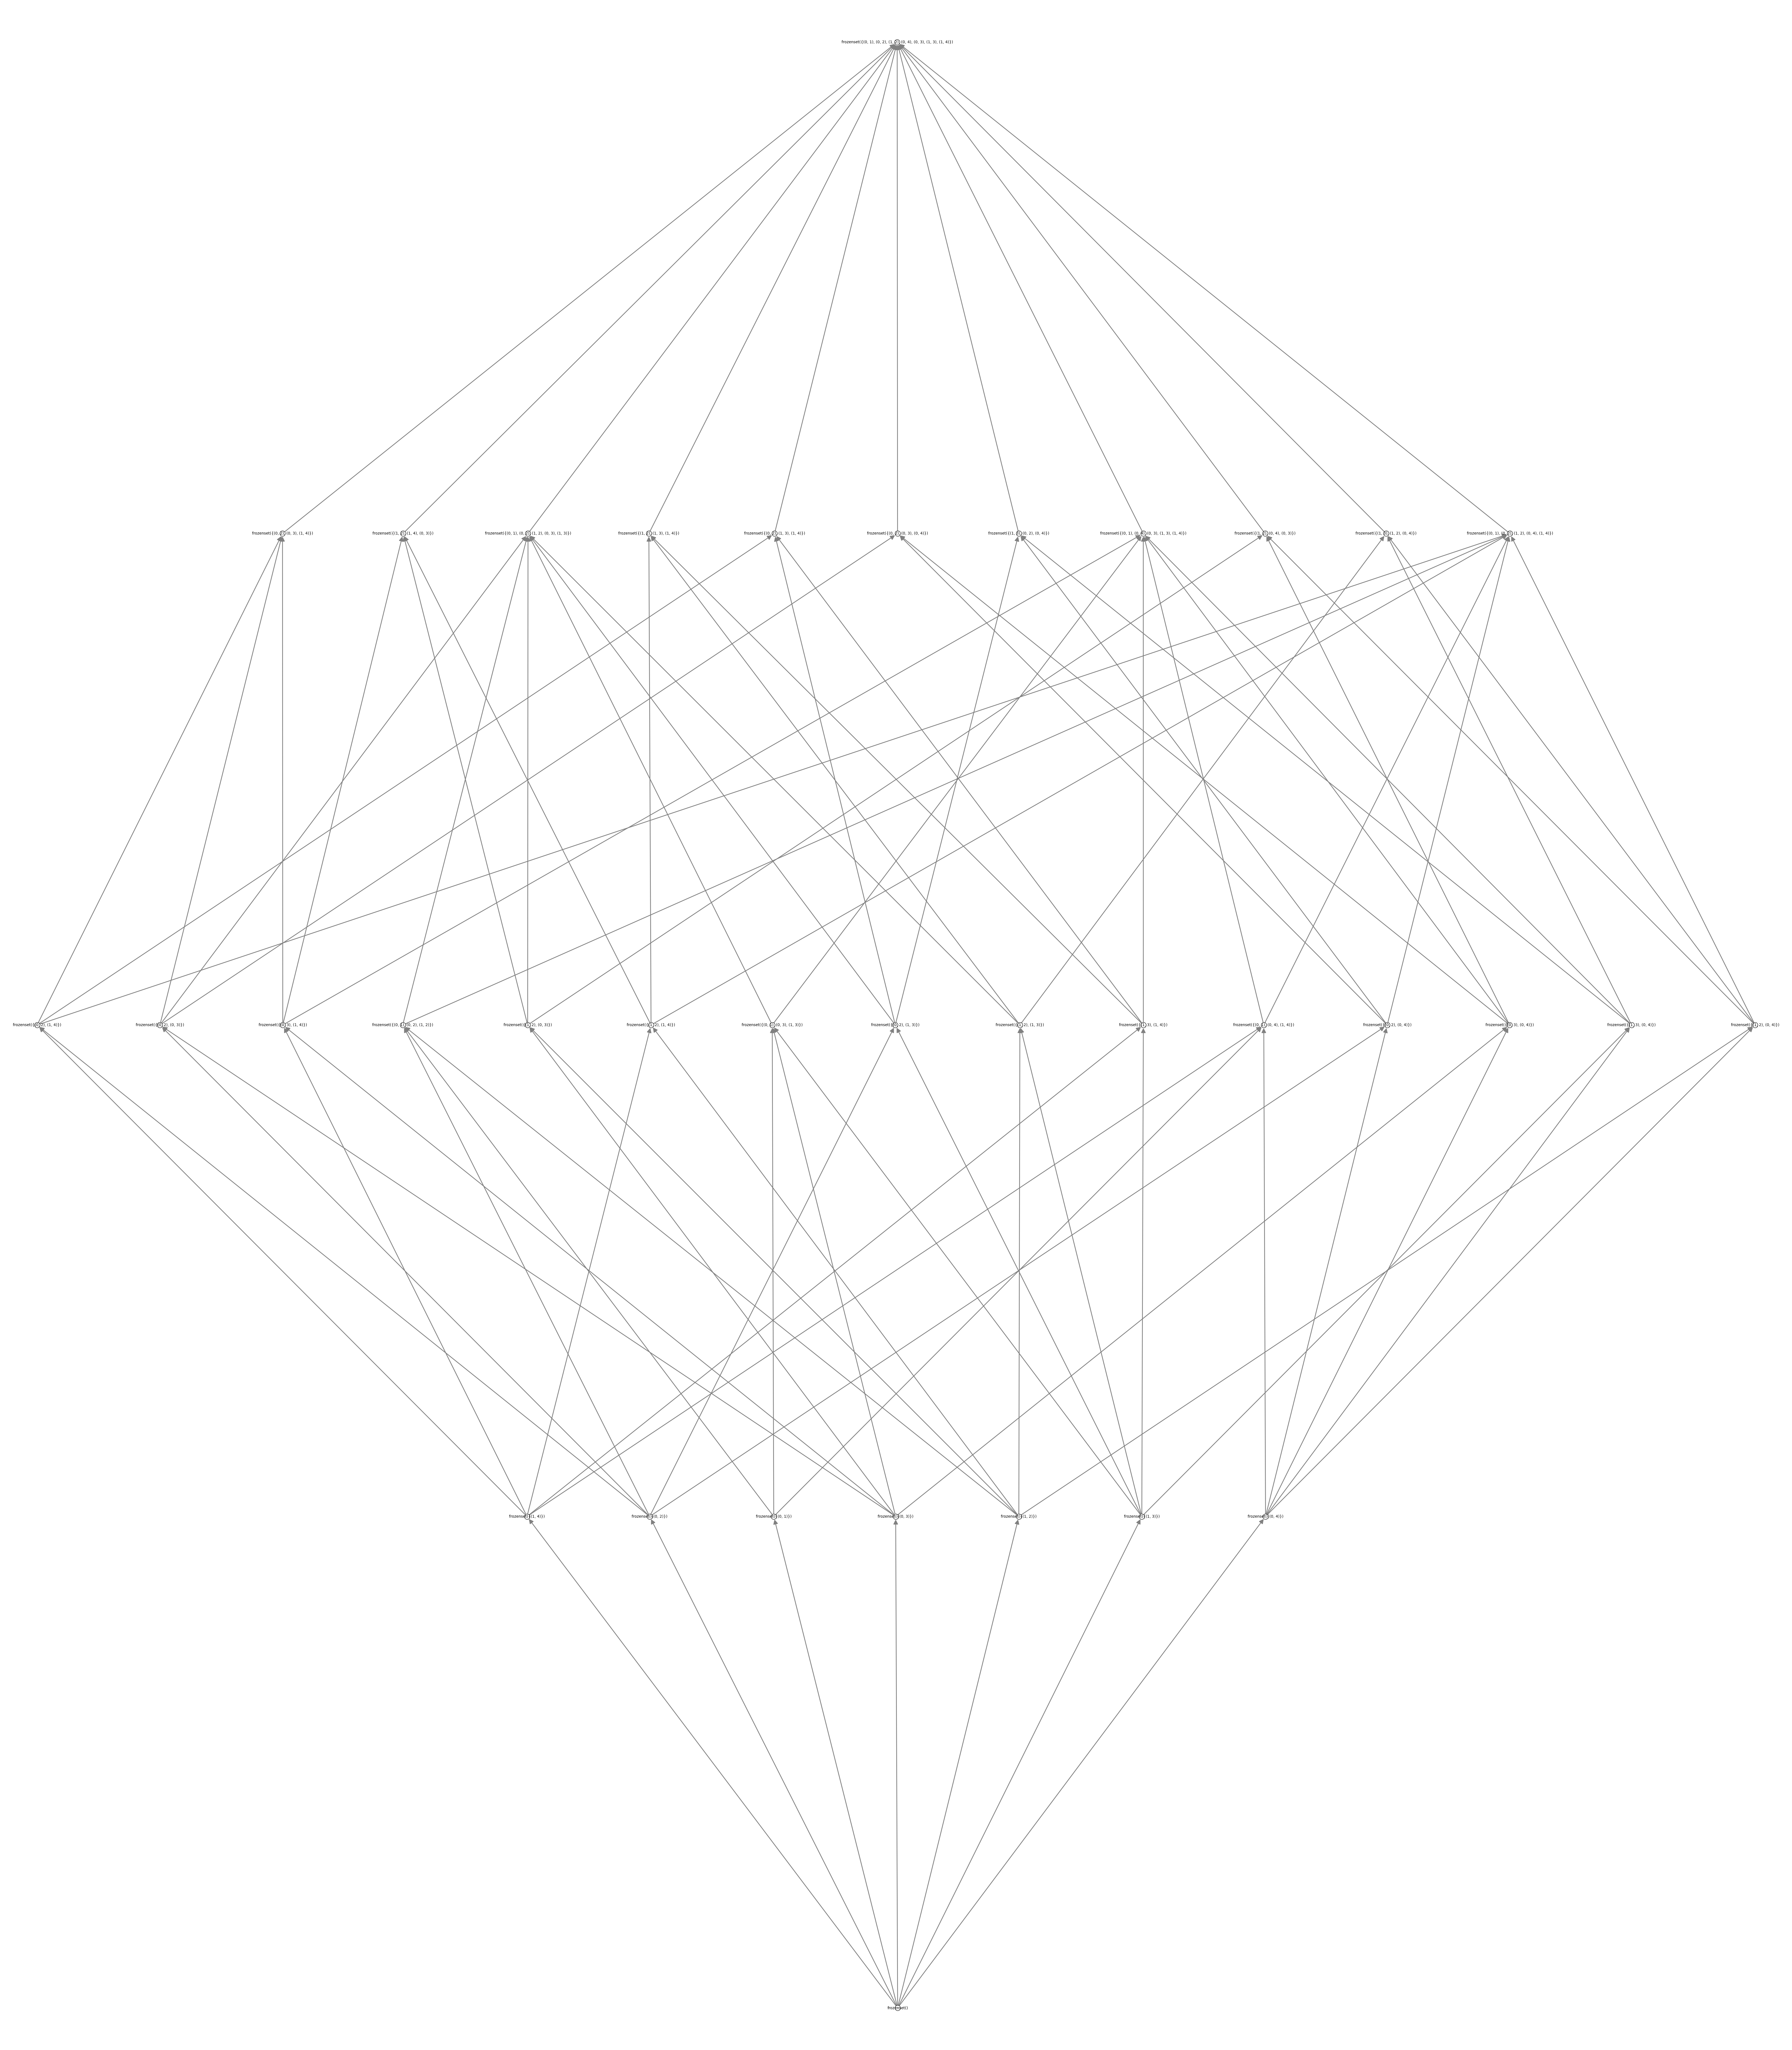

In [13]:
n = 3

graph = graphs.CompleteBipartiteGraph(2, n)
graph.add_edge(0, 1)
edgelist = graph.edges(labels=False)
matroid = Matroid(graph=edgelist, groundset=edgelist)

rank = matroid.rank()

flats = [list(matroid.flats(i)) for i in range(rank + 1)]
all_elements = sum(flats, [])  # Flatten the list of flats
labels = {element: idx for idx, element in enumerate(all_elements)}
matroid.lattice_of_flats().plot(
    element_color = "white",
    figsize= 100, cover_color = "grey")

In [14]:
R.<x> = PolynomialRing(QQ)
Sym = SymmetricFunctions(R)
Sym.inject_shorthands()

Defining e as shorthand for Symmetric Functions over Univariate Polynomial Ring in x over Rational Field in the elementary basis
Defining f as shorthand for Symmetric Functions over Univariate Polynomial Ring in x over Rational Field in the forgotten basis
Defining h as shorthand for Symmetric Functions over Univariate Polynomial Ring in x over Rational Field in the homogeneous basis
Defining m as shorthand for Symmetric Functions over Univariate Polynomial Ring in x over Rational Field in the monomial basis
Defining p as shorthand for Symmetric Functions over Univariate Polynomial Ring in x over Rational Field in the powersum basis
Defining s as shorthand for Symmetric Functions over Univariate Polynomial Ring in x over Rational Field in the Schur basis


In [15]:
def equiv_thag(n):
    graph = graphs.CompleteBipartiteGraph(2, n)
    graph.add_edge(0, 1)
    edgelist = graph.edges(labels=False)
    matroid = Matroid(graph=edgelist, groundset=edgelist)

    g = SymmetricGroup(range(n+2))
    transpositions = set([(i, i+1) for i in range(2, n+1)])
    grp = g.subgroup(transpositions)
    

In [16]:
def boo_chow(n):
    import json
    with open("data/matroids.json", "r") as f:
        matroids_data = json.load(f)
    key = f"U({n}, {n})"
    if key in matroids_data:
        print(key, matroids_data[key]["dir"], "\n")
    else:
        print(f"No data found for U({j}, {i})")
    partitions = Partitions(n).list()
    print(partitions)

    poly = R(0)
    for idx, val in enumerate(matroids_data[key]["dir"]):
        term = [j * s(partitions[i]) for i, j in enumerate(val)]
        poly = poly + x ** idx * sum(term)
    
    return poly
        